In [ ]:
import numpy as np
from numpy.linalg import eig
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

A. How many non-zero principal components of X are there?

2

B. What is the overall covariance of X?

The overall covariance matrix of X can be calculated as a weighted sum of the conditional covariance matrices $Σ_0$ and $Σ_1$, weighted by the probabilities of the two states of Y:

$Cov(X) = p(Y=0) * Σ_0 + p(Y=1) * Σ_1$

In this case, $p(Y=0) = p(Y=1) = 0.5$, so the overall covariance matrix is simply:

$Cov(X) = 0.5 * Σ_0 + 0.5 * Σ_1 = 0.5 * (Σ_0 + Σ_1)$

Plugging in the values, this results in the matrix below:

$$\begin{bmatrix} 1 & 0.5 \\ 0.5 & 1.5 \end{bmatrix}$$

C. What are the eigenvectors and eigenvalues of cov(X)?

The eigenvalues are $$\frac{5+\sqrt{5}}{4}, \frac{5-\sqrt{5}}{4}$$

For the first eigenvalue, its eigenvector is
$$\begin{bmatrix} \frac{-1-\sqrt{5}}{2} * v_2 \\ v_2 \end{bmatrix}$$

For the second eigenvalue, its eigenvector is
$$\begin{bmatrix} \frac{-1+\sqrt{5}}{2} * v_2 \\ v_2 \end{bmatrix}$$

D. For n ∈ {10, 100, 1000, 10^4}, sample from X, and plot the points, along with the principal components vectors scaled by their eigenvalues (compute the principal components from the sample data).

The sample eigenvalues are 0.7860257501845123 and 1.5520729124927803
The corresponding eigenvectors are [-0.83  0.55] and [-0.55 -0.83] 


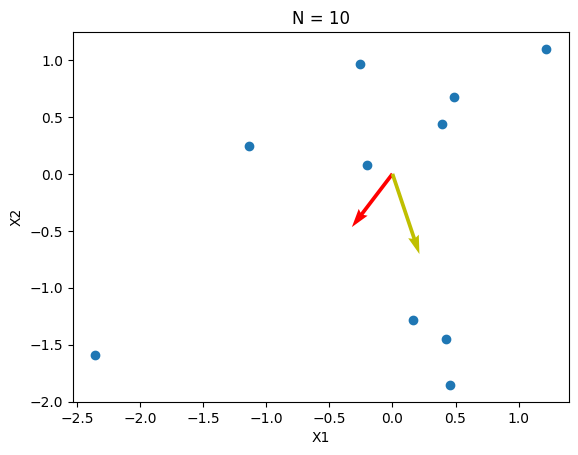

The sample eigenvalues are 0.7371423085767512 and 1.8477310902888016
The corresponding eigenvectors are [-0.75  0.66] and [-0.66 -0.75] 


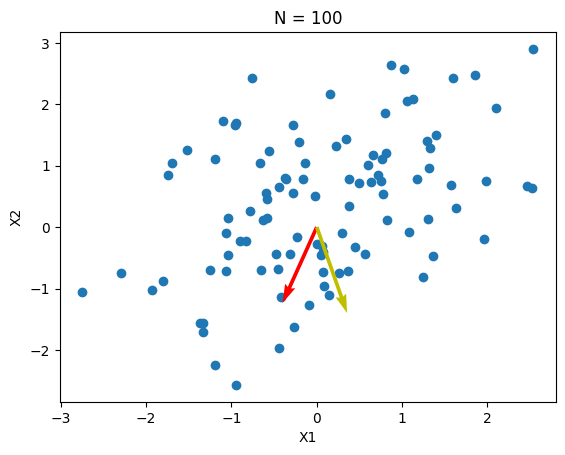

The sample eigenvalues are 0.7083064017800171 and 1.709130855306388
The corresponding eigenvectors are [-0.84  0.54] and [-0.54 -0.84] 


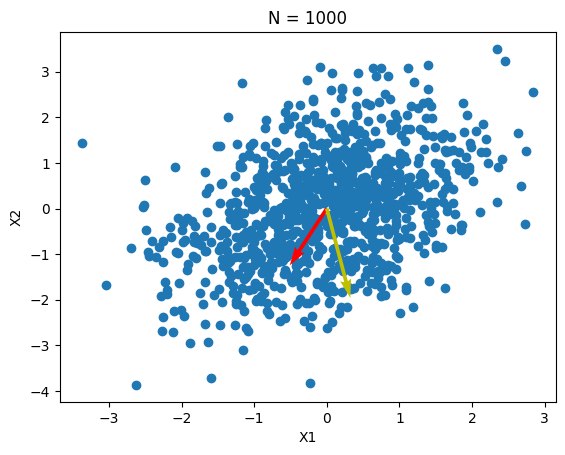

The sample eigenvalues are 0.6987348192158684 and 1.806642216878695
The corresponding eigenvectors are [-0.86  0.52] and [-0.52 -0.86] 


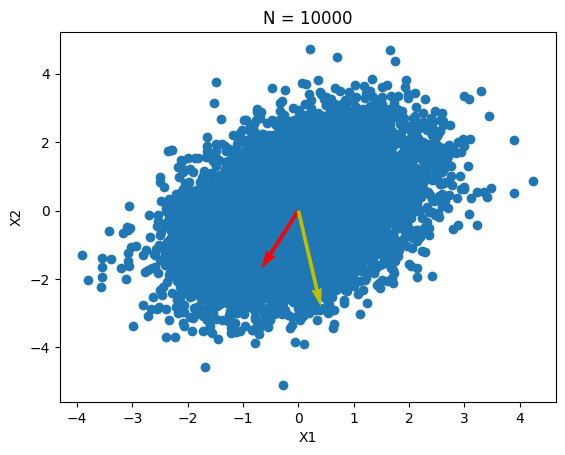

In [ ]:
n = np.geomspace(10, 10000, 4, dtype = int)
mean = np.zeros(2)
cov = np.array([[1, 0.5],[0.5, 1.5]])
for i in range(4):
  x1, x2 = np.random.default_rng().multivariate_normal(mean, cov, n[i]).T
  val, vec = eig(np.cov(x1, x2))
  print(f'The sample eigenvalues are {val[0]} and {val[1]}')
  print(f"The corresponding eigenvectors are {np.array2string(vec[:, 0], precision=2, floatmode='fixed')} and {np.array2string(vec[:, 1], precision=2, floatmode='fixed')} ")
  plt.figure()
  plt.scatter(x1, x2)
  plt.quiver([0, 0], [0, 0], val[0] * vec[:, 0], val[1] * vec[:, 1] , color=['r', 'y'], scale = 8)
  plt.title(f'N = {n[i]}')
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.show()

E.  Show that as n → ∞, the eigenvectors and eigenvalues of the sample covariance matrix converge to
the truth (i.e. Σ).

Population covariance: $$ Cov(x,y) = \frac{1}{N} Σ(x-x^{-})(y-y^{-}) $$
Sample covariance: $$ Cov(x,y) = \frac{1}{N-1} Σ(x-x^{-})(y-y^{-}) $$

As n → ∞, the difference between the population and sample covariance becomes negligible. This results in near equal eigenvalues and eigenvectors.

F. What is the significance of this convergence?
<br>
This convergence has broader implications in statistics. It provides a foundation for statistical inference and hypothesis testing. In practical terms, it means that with a sufficiently large sample size, the sample covariance matrix becomes a good estimate of the true underlying covariance structure of the data. This is important for various statistical analyses, including principal component analysis (PCA), hypothesis testing, and parameter estimation. With a larger sample size, you can have more confidence in the accuracy of your estimates and inferences, which is essential in many scientific and data analysis applications.